# 0.-Data Loading

In [1]:
import os
import pandas as pd

df = pd.read_csv('emi_ml_i.csv', sep = '|')
df.head()

,Unnamed: 0,esp,esp_24,esp_48,esp_daily_24,co2_24,co2_48,mibgas,mibgas_24,Nuclear,Solar termica,Eolica,Solar fotovoltaica,Demanda programada PBF total
0,2016-01-08 00:00:00,24.36,14.1,18.11,28.450417,7.54,7.74,18.75,19.0,6100.4,0.0,12911.8,4.2,26540.0
1,2016-01-08 01:00:00,19.33,8.0,12.40,28.450417,7.54,7.74,18.75,19.0,6100.4,0.0,12736.1,4.2,24373.1
2,2016-01-08 02:00:00,16.10,5.4,7.88,28.450417,7.54,7.74,18.75,19.0,6100.4,0.0,12592.4,4.2,23096.7
3,2016-01-08 03:00:00,15.00,4.5,7.00,28.450417,7.54,7.74,18.75,19.0,6100.4,0.0,12395.6,4.2,22524.9
4,2016-01-08 04:00:00,15.00,4.0,6.50,28.450417,7.54,7.74,18.75,19.0,6100.4,0.0,12066.6,4.2,22387.3


# 1.- Some Data Exploration
## 1.1.- Temporal Series Representation

A deeper dive on the data we are working on

In [2]:
df.columns

Index(['Unnamed: 0', 'esp', 'esp_24', 'esp_48', 'esp_daily_24', 'co2_24',
       'co2_48', 'mibgas', 'mibgas_24', 'Nuclear', 'Solar termica', 'Eolica',
       'Solar fotovoltaica', 'Demanda programada PBF total'],
      dtype='object')

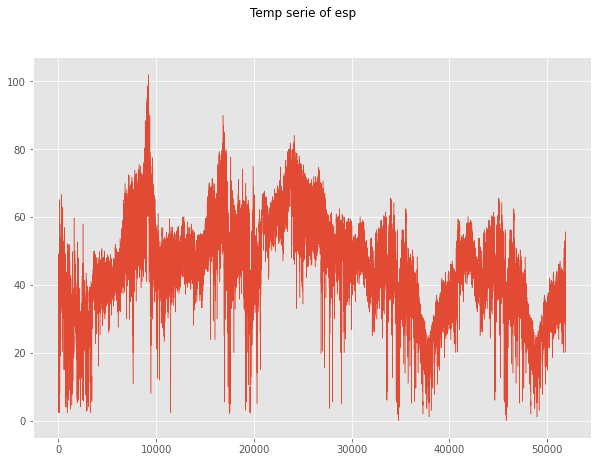

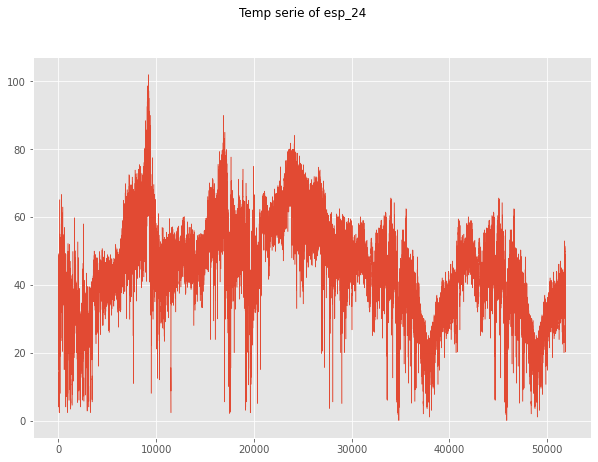

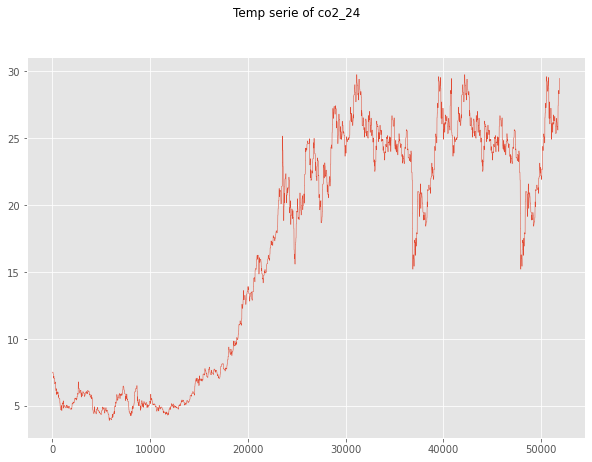

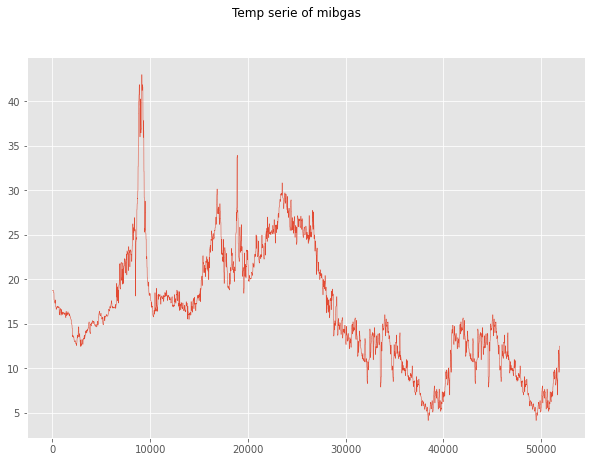

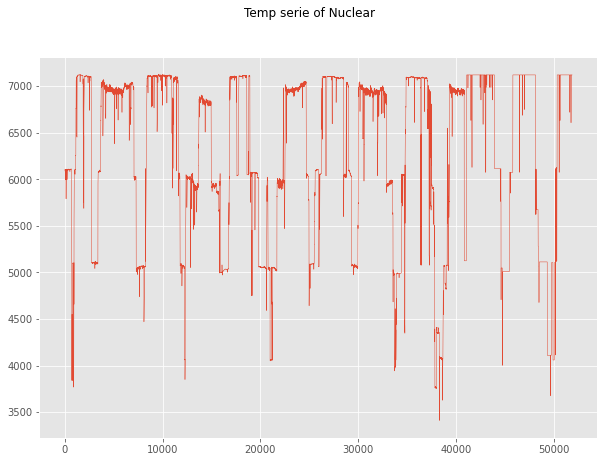

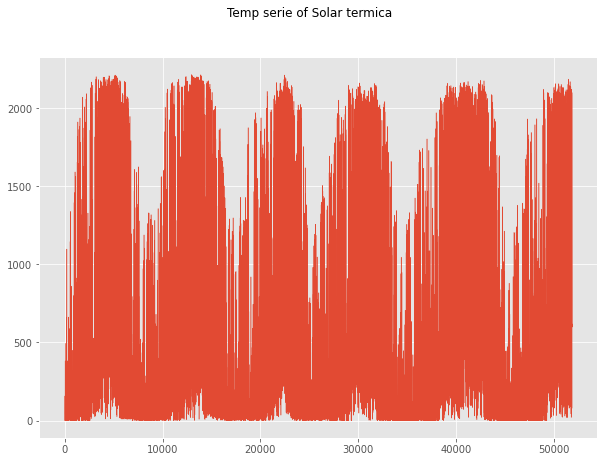

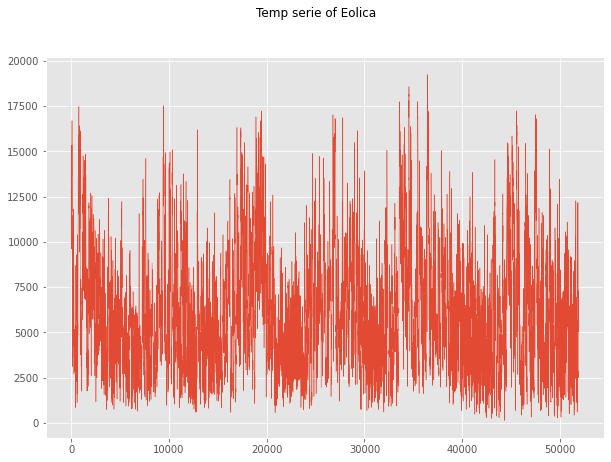

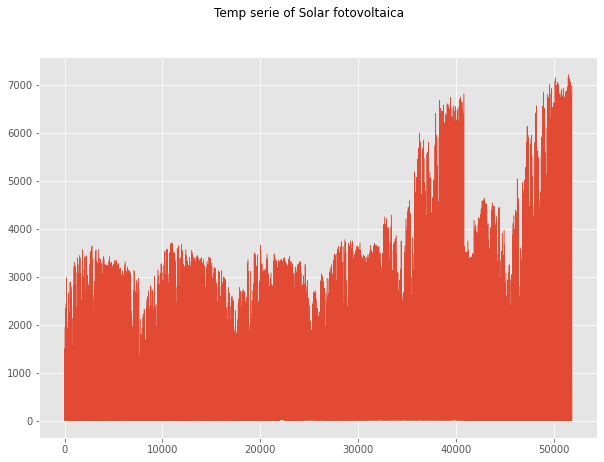

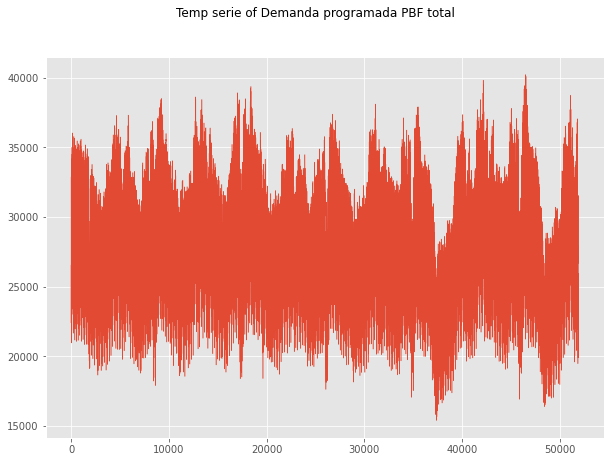

In [15]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [10, 7]

for column in ['esp','esp_24', 'co2_24', 'mibgas', 'Nuclear',
       'Solar termica', 'Eolica', 'Solar fotovoltaica',
       'Demanda programada PBF total']:
    df[column].plot(linewidth  = 0.5)
    plt.suptitle("Temp serie of " + column)
    plt.show()
    

## 1.2.- Studying the response variable
Let us calculate some statistics and do some previous plotting over the response variable.

In [11]:
df['esp'].describe()

count    51888.000000
mean        44.616562
std         15.169664
min          0.030000
25%         35.257500
50%         45.250000
75%         54.470000
max        101.990000
Name: esp, dtype: float64

Text(0.5, 1.0, 'Energy Price Distribution')

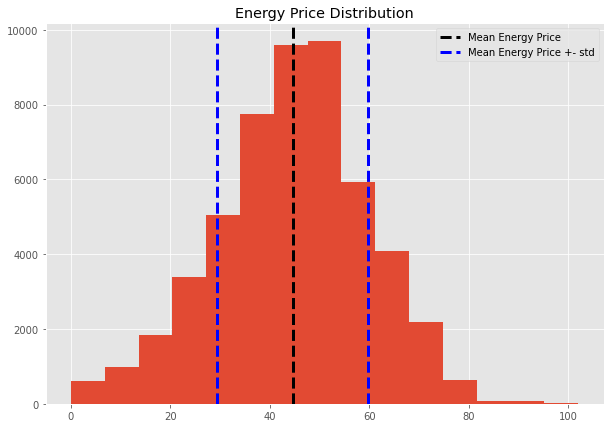

In [27]:
df['esp'].hist(bins = 15)
plt.axvline(df['esp'].mean(), color='k', linestyle='dashed', linewidth=3)
plt.axvline(df['esp'].mean() + df['esp'].std(), color='b', linestyle='dashed', linewidth=3)
plt.axvline(df['esp'].mean() - df['esp'].std(), color='b', linestyle='dashed', linewidth=3)
plt.legend(['Mean Energy Price', 'Mean Energy Price +- std'])
plt.title('Energy Price Distribution')

In [28]:
df['esp'].kurt(), df['esp'].skew()

(0.051568697694510224, -0.19941840642302242)

AS we can see we are working on a rather normal distributed variable with not much outliers neither not to sharpen which is confirmed by the low values of kurtosis and skewness.

### 1.1.1.- Movin averages calculations
Pandas package has some nice features to obtain in an easy and fast way the values from moving averages. This is a very important feature since this is used as an investment strategy by some people even now. Just because we know the data changes on an hourly basis we need to multiply the number of days we want to calculate the moving average and the number of hours a day we have (24). In order to plot these result we will create a new df.

In [36]:
df['esp_mm_7_days']  = df['esp'].rolling(window =  7  * 24).mean() 
df['esp_mm_14_days'] = df['esp'].rolling(window = 14 * 24).mean() 
df['esp_mm_60_days'] = df['esp'].rolling(window = 60  * 24).mean()
# df.head(7*25)

In [34]:
df_plot = df[['Unnamed: 0', 'esp', 'esp_24', 'esp_48', 'esp_daily_24','esp_mm_7_days', 'esp_mm_14_days', 'esp_mm_60_days']]

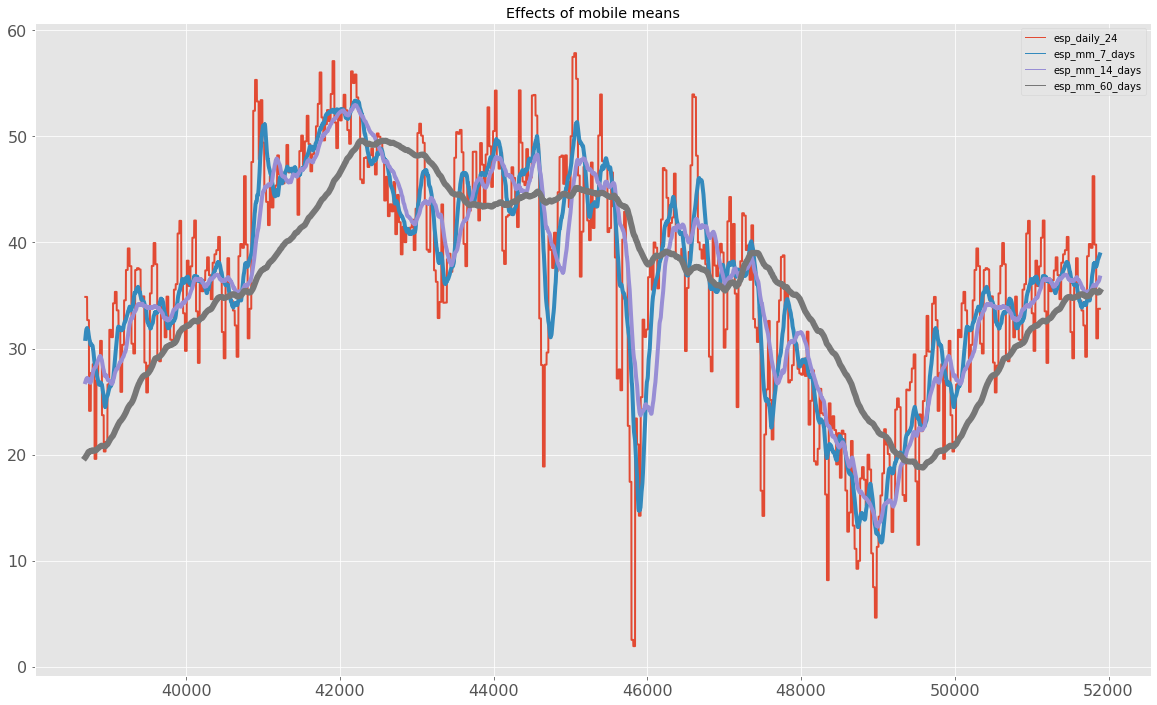

In [38]:
%matplotlib inline   
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 18, 8

fig, ax = plt.subplots()
df_plot[['esp_daily_24', 'esp_mm_7_days', 'esp_mm_14_days', 'esp_mm_60_days']].iloc[-550*24:].plot(figsize=(20,12), 
            title="Effects of mobile means", lw=1, fontsize=16, ax=ax, grid=True)

for line in ax.get_lines():
    if line.get_label() == 'esp_mm_60_days':
        line.set_linewidth(6)
    if line.get_label() == 'esp_mm_14_days':
        line.set_linewidth(4)
    if line.get_label() == 'esp_mm_7_days':
        line.set_linewidth(4)
    if line.get_label() == 'esp_daily_24':
        line.set_linewidth(2)
plt.show()


We can see that the longer time we are calculating the moving average, the softer the function is. Depending on the period, when a line crosses over another it is a good choice selling that value or on the contrary, buying that value when we are on the other case. We have represented 550 days, which is a year and a half of data. We can see it more clearly if we plot two years of  both the longest and the shortest moving averages_:

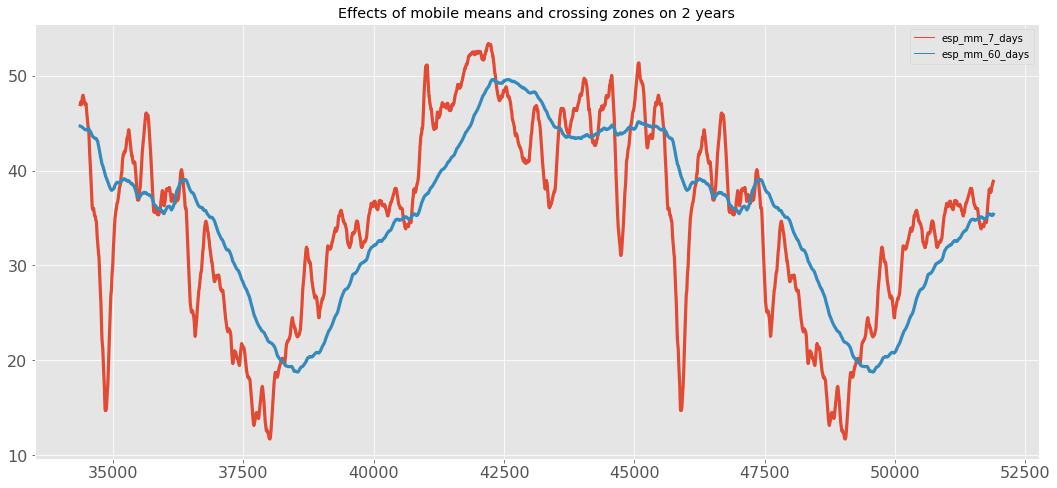

In [76]:
%matplotlib inline   
# esto hace que los gráficos se visualicen en el notebook
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 18, 8

fig, ax = plt.subplots()
df_plot[['esp_mm_7_days', 'esp_mm_60_days']].iloc[-365*2*24:].plot(
            title="Effects of mobile means and crossing zones on 2 years", lw=1, fontsize=16, ax=ax, grid=True)

for line in ax.get_lines():
    if line.get_label() == 'esp_mm_7_days':
        line.set_linewidth(3.2)
    if line.get_label() == 'esp_mm_60_days':
        line.set_linewidth(3.2)
plt.show()

Correlation. Now we can keep up by studying the correlation of all the variables with the response variable and plotting that Pearson correlation:

In [40]:
df.corr()

,esp,esp_24,esp_48,esp_daily_24,co2_24,co2_48,mibgas,mibgas_24,Nuclear,Solar termica,Eolica,Solar fotovoltaica,Demanda programada PBF total,esp_mm_7_days,esp_mm_14_days,esp_mm_60_days
esp,1.000000,0.879166,0.804641,0.849179,-0.112266,-0.112234,0.729689,0.722716,0.111621,0.020927,-0.294576,-0.110468,0.447474,0.838309,0.814530,0.744286
esp_24,0.879166,1.000000,0.879168,0.922103,-0.110522,-0.110554,0.720703,0.729156,0.109980,0.012417,-0.171694,-0.115240,0.380172,0.858801,0.828654,0.751883
esp_48,0.804641,0.879168,1.000000,0.848882,-0.107913,-0.107352,0.712142,0.719428,0.107667,0.005090,-0.086494,-0.116632,0.317666,0.868164,0.837506,0.757306
esp_daily_24,0.849179,0.922103,0.848882,1.000000,-0.120114,-0.120149,0.781678,0.790841,0.118039,-0.024930,-0.189029,-0.161612,0.215280,0.930413,0.897434,0.814396
co2_24,-0.112266,-0.110522,-0.107913,-0.120114,1.000000,0.998072,-0.445035,-0.444438,0.045559,0.038918,0.002987,0.147150,-0.044966,-0.130192,-0.131080,-0.150402
co2_48,-0.112234,-0.110554,-0.107352,-0.120149,0.998072,1.000000,-0.445002,-0.444230,0.048491,0.038726,0.004958,0.146935,-0.044216,-0.129413,-0.130677,-0.148848
mibgas,0.729689,0.720703,0.712142,0.781678,-0.445035,-0.445002,1.000000,0.992745,0.057653,-0.136628,0.026876,-0.235239,0.176987,0.829243,0.836140,0.833560
mibgas_24,0.722716,0.729156,0.719428,0.790841,-0.444438,-0.444230,0.992745,1.000000,0.059004,-0.138896,0.040063,-0.236441,0.173713,0.832039,0.839107,0.836581
Nuclear,0.111621,0.109980,0.107667,0.118039,0.045559,0.048491,0.057653,0.059004,1.000000,0.049581,-0.070680,-0.015892,0.193353,0.132337,0.148501,0.201071
Solar termica,0.020927,0.012417,0.005090,-0.024930,0.038918,0.038726,-0.136628,-0.138896,0.049581,1.000000,-0.234689,0.751209,0.359832,-0.042185,-0.055689,-0.137026


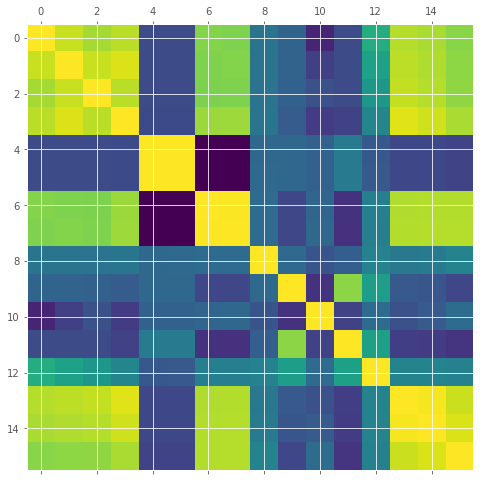

In [41]:
plt.matshow(df.corr())
plt.show()

## TIME SERIES DECOMPOSITION
It is common to think about time series as a combination of 4 components. All series have a level and noise. The trend and seasonality components are optional.
It is helpful to think of the components as combining additively. All series have a level and noise. The trend and seasonality components are optional.
It is helpful to think of the components as combining additively as follows: 

y(t) = Level + Trend + Seasonality + Noise

We know we have about 6 years of data (df['esp'].shape[0]/24/365) ~ 6 so I will be plotting the first 3 years one by one by timelapses of 4 months in order not to obtain too ugly graphs.

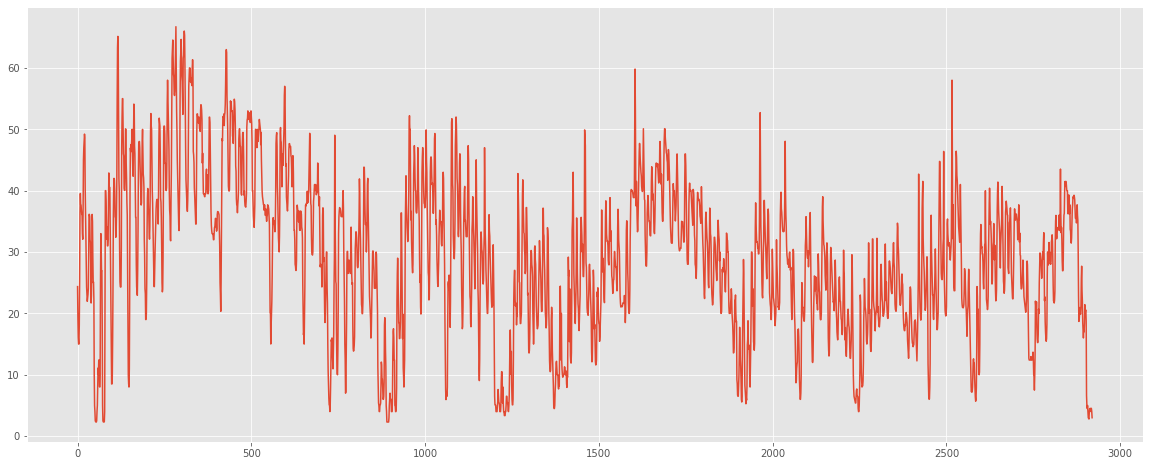

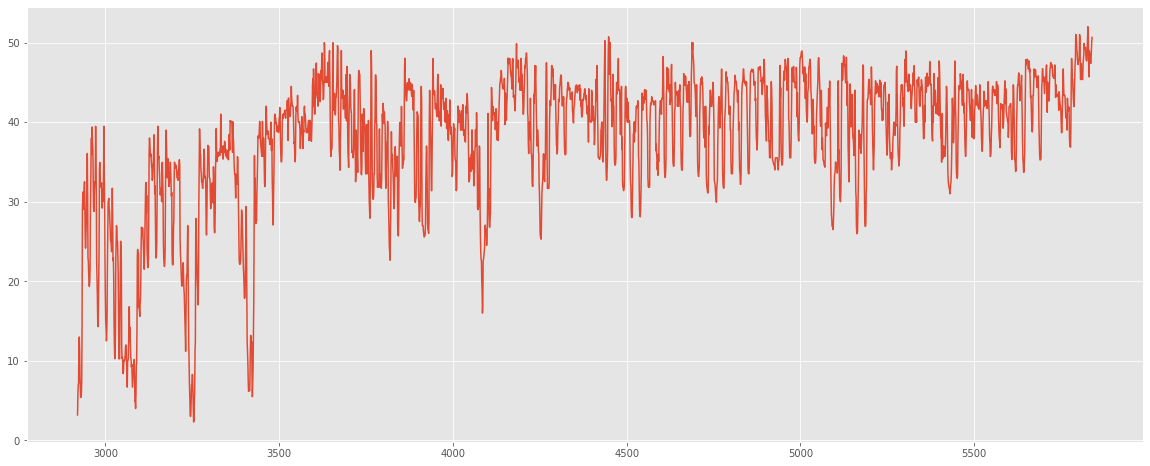

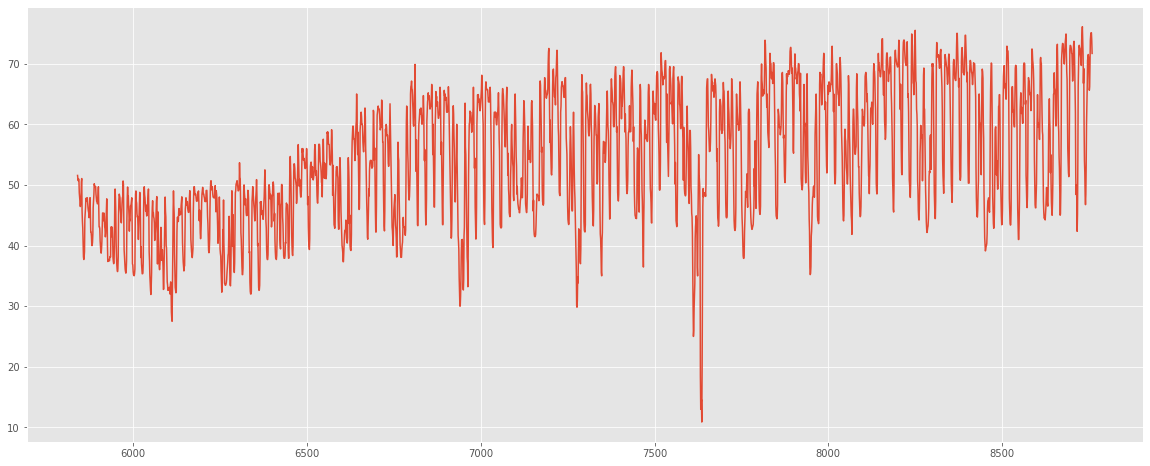

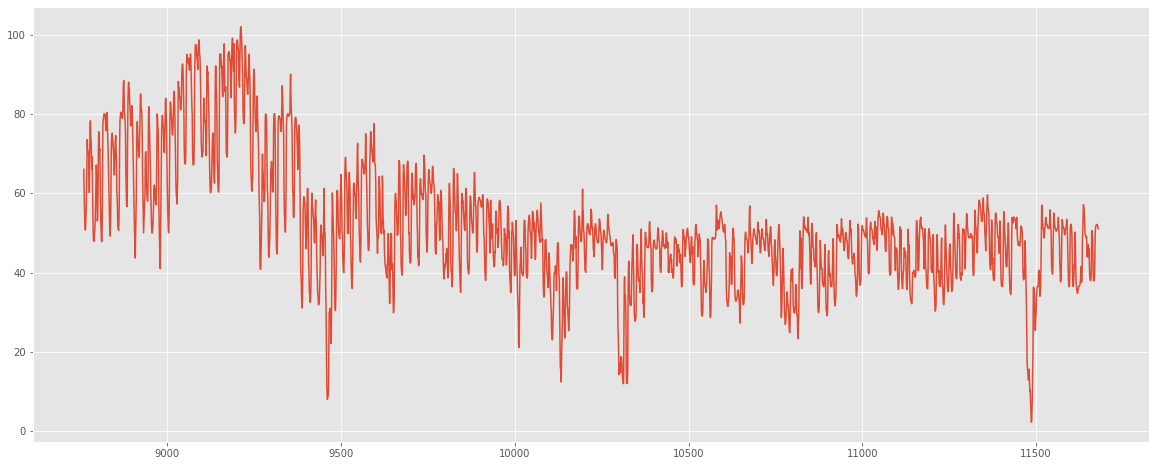

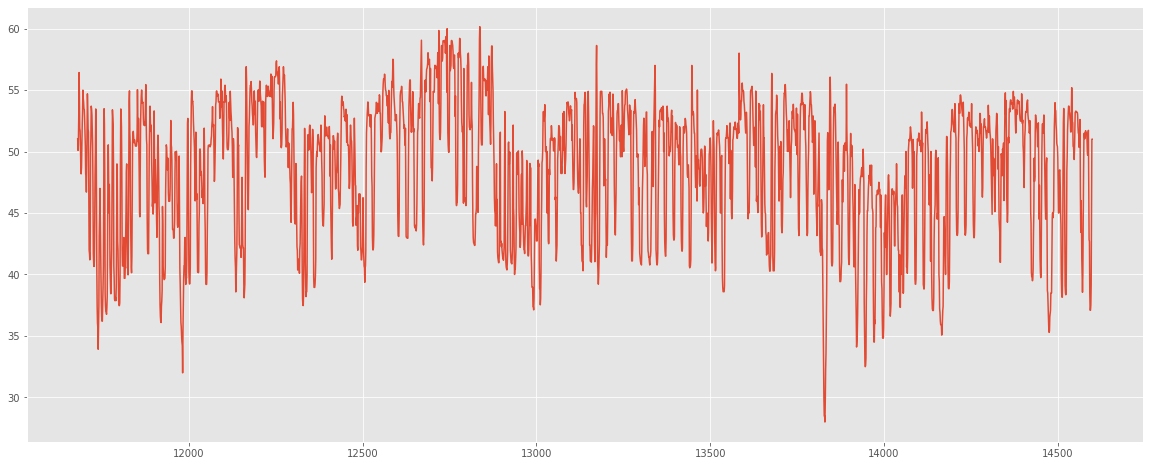

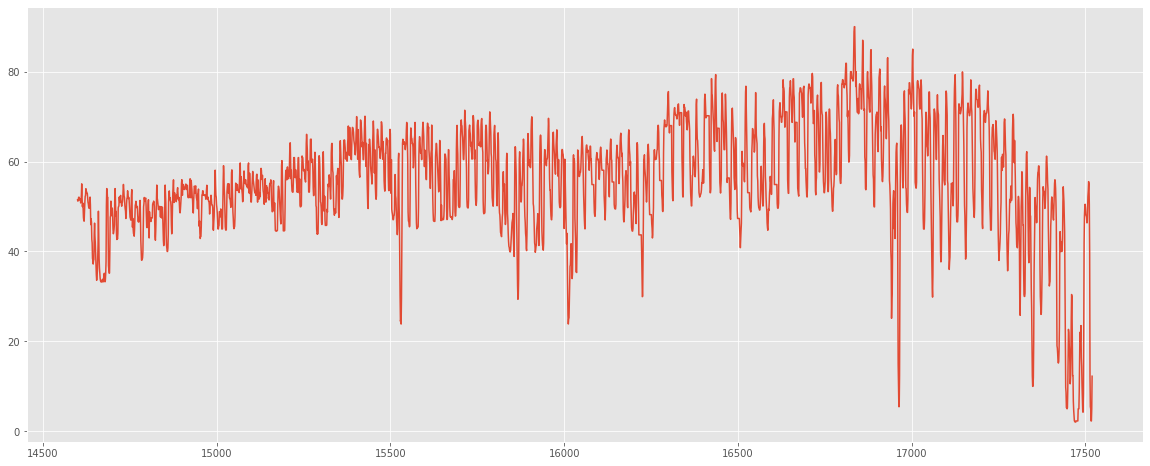

In [84]:
q = 0
pylab.rcParams['figure.figsize'] = 20, 8

hours_by_trimester = int(365*24/3)
for i in range(0,6):
    df['esp'][q:q+hours_by_year].plot()
    plt.show()
    q += hours_by_trimester
# df['esp']

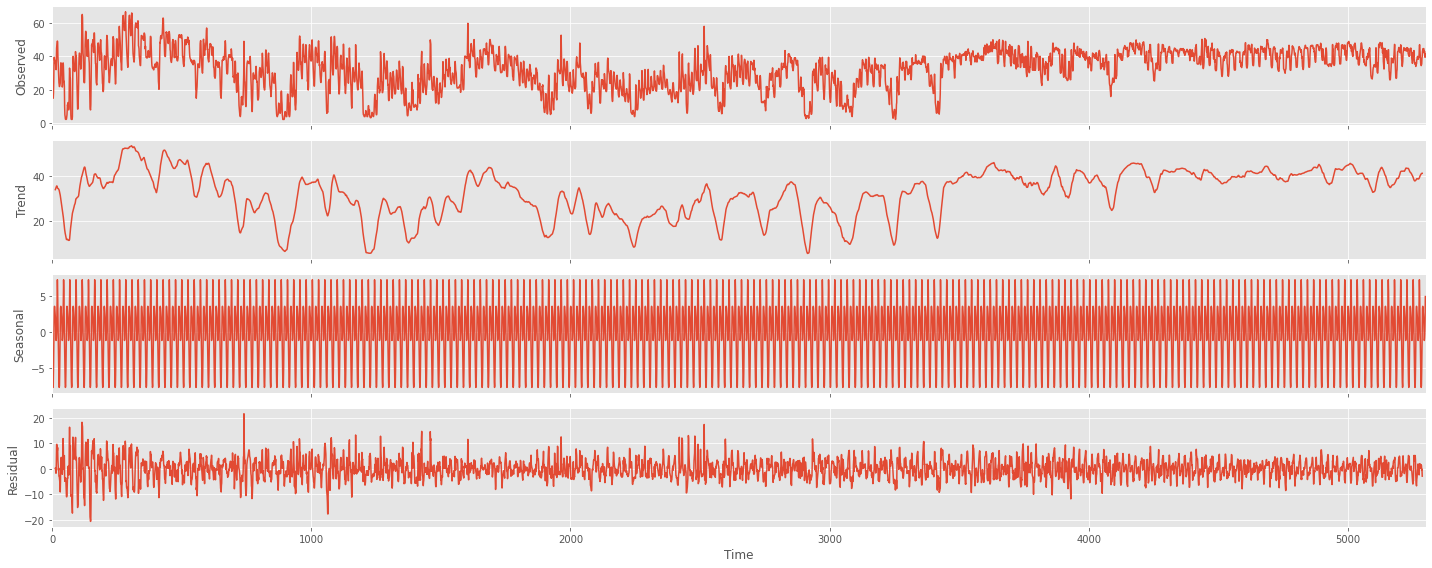

In [91]:
from random import randrange
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['esp'].iloc[:5300].values, model='additive', freq = 24)
result.plot()
pyplot.show()

SEASONALITY DECOMPOSITION 
tENEmos 24 horas, ergo freq = 24. se reducen los puntos para verlo mejor. No hay un trend claro recurrente. Sin embargo, si que parece haber seasonality, podrían ser las horas del día!!


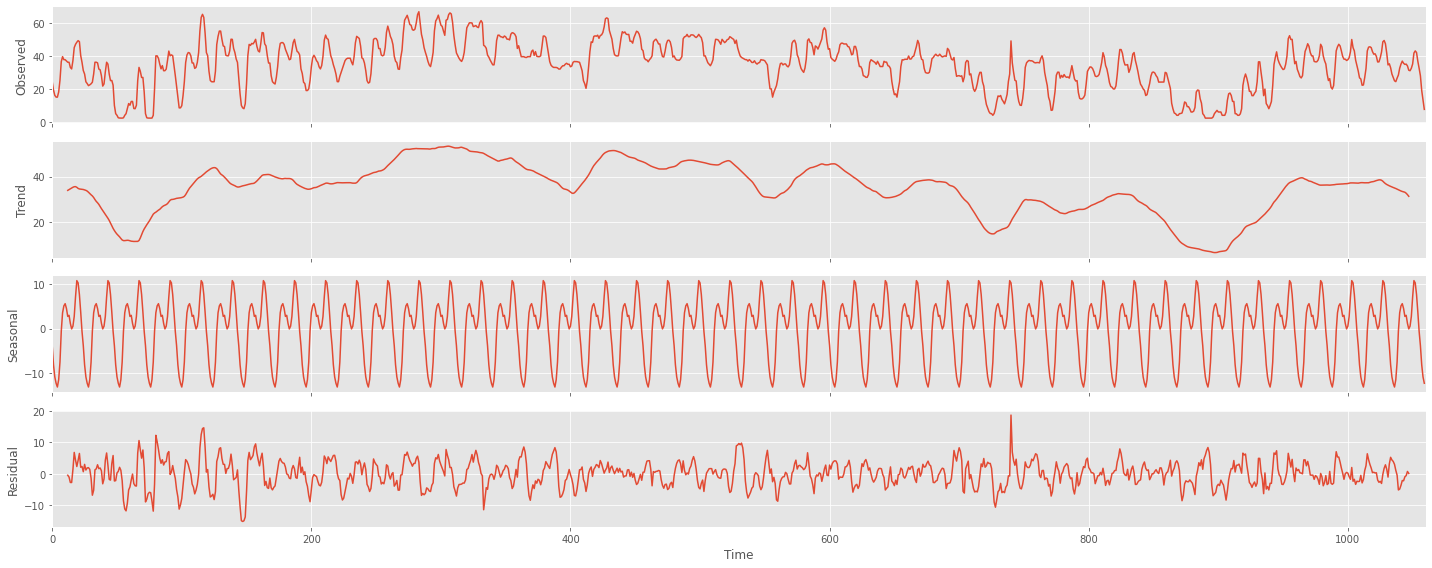

In [94]:
from random import randrange
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['esp'].iloc[:1060].values, model='additive', freq = 24)
result.plot()
pyplot.show()

<AxesSubplot:>

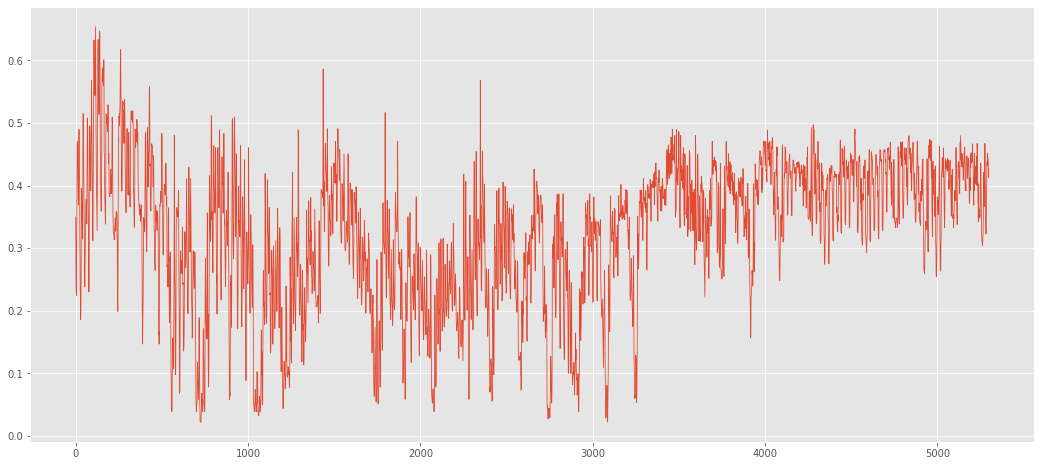

In [58]:
pd.Series(y_sc.flatten()[:5300]).plot(linewidth  = 0.8)

In [57]:
x_sc, y_sc = x_sc[168:], y_sc[168:]
print(" After ---> ", x_sc.shape, y_sc.shape)

 After --->  (51720, 11) (51720, 1)


## TIME SERIES DECOMPOSITION
It is common to think about time series as a combination of 4 components. All series have a level and noise. The trend and seasonality components are optional.
It is helpful to think of the components as combining additively. All series have a level and noise. The trend and seasonality components are optional.

It is helpful to think of the components as combining

## 2.0.-  Machine Learning Modelling
Now that we have more knowledge about our date we are going to perform some popular techniques on time series forecasting and we are going to study the impact and the performance of these techniques. This will be on different notebooks.

### 2.0.1.- Some previous preprocessing and data "exportation"
We will begin by dropping columns that are not useful for our modellization (because they have been mainly created for data understanding purposes) and performing data scaling using the most common approach to do so. We are also dropping the data which is previous to the first 2 weeks in order not to have nans on our date ( this is reason for the 168 we will use to cut date lately). Since we have plenty of data we are allowed to do so. Although we have seen that there might be some daily/ any frequency seasonality we are going to forget about it and drop the column that represents time stamps and use just the pure numerical columns:

In [ ]:
df_undated = df.drop(['Unnamed: 0', 'esp_48', 'co2_48', 'esp_mm_14_days', 'esp_mm_14_days', 'esp_mm_60_days'], axis = 1)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_sc = scaler.fit_transform(df_undated.drop(['esp'], axis = 1))
y_sc = scaler.fit_transform(df_undated['esp'].values.reshape(-1, 1))
print(f" Original shape --> {df_undated.shape}, X --> {x_sc.shape}, Y--> {y_sc.shape}")
print(" Before ---> ", x_sc.shape, y_sc.shape)
x_sc, y_sc = x_sc[168:], y_sc[168:]
print(" After ---> ", x_sc.shape, y_sc.shape)

In [96]:
import numpy as np
np.savetxt("x_sc.csv", x_sc, delimiter=",")
np.savetxt("y_sc.csv", y_sc, delimiter=",")